In [ ]:
import pandas as pd
path = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(path)

In [ ]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1529,190001063482,2019,2927408,Salvador,29,BA,42,F,1,3,1,1501402.0,Belém,15.0,PA,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CADDCEDACCDADAADDEBBCEDDECBCEBACCBBBDCBEABCBD,BDCAA99999BBCCBDEAAECADBDAAADCACDBDCCAEEBDECEC...,CBBECDDBCCACEBDCABDCADEDBCBCAEDBCEAABDCBACBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,100.0,120.0,60.0,520.0,E,E,B,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
2578,190001106992,2019,2911105,Formosa do Rio Preto,29,BA,21,F,1,3,1,2700706.0,Batalha,27.0,AL,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEDBCBDAEBDCDBDCAECBDECBEDBEECDBACBCDBCAEDDEA,99999DBBCDDCCCBACDEBCBDEBDCBADBBDDCACCAAEADBCB...,BBBCBCDCCCECBECECCBCDDEDBBDDCCECDEBECECABCCCA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,80.0,60.0,100.0,0.0,340.0,B,B,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
2823,190001116919,2019,2911105,Formosa do Rio Preto,29,BA,20,M,1,1,2,NaN,NaN,NaN,NaN,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBEBEBAABADDBBEABECBEADAECBEC*BBECDADAEADBAAD,99999CEAAEACCDEEABDAADEEDBDBEAECC*DAEBEDBCAEAA...,EADECBADDCDEABEABDEACEBBCDADEACEBCEBEABCCEABD,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,100.0,560.0,D,D,A,A,7,B,A,B,D,B,B,B,A,B,A,A,A,A,B,A,A,D,A,A,B
2826,190001117082,2019,2911105,Formosa do Rio Preto,29,BA,18,F,1,4,1,2903201.0,Barreiras,29.0,BA,2,0,2,1.0,0,29526604.0,2911105.0,Formosa do Rio Preto,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BADDDEAEABEEBBBACBACDDDADCBEEECADBCAACCCAEBDB,DEABE99999DABCBBEACEDADEBECADEAECDEBCCDBABDDCA...,DEEEACDACAEBDADACBEAEEEDDCEBDEDEDDBDCABEDAEDC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,140.0,120.0,120.0,620.0,C,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
5499,190001219898,2019,2915601,Itamaraju,29,BA,16,F,1,3,1,2915601.0,Itamaraju,29.0,BA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CE*BCBABABDADBEEBACCCEBCBEBEEAABEADAAABDABBEA,99999AEAABCCBAEBDAAAAACECEEECABECCCACBDAAEDBBA...,AABACBEBDCDCBBBDADBDCECDAEBECAADEBABCABACDBCB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,100.0,100.0,120.0,80.0,520.0,B,E,A,B,4,B,A,B,C,B,B,B,B,A,A,A,A,A,B,A,A,E,A,B,B


In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

In [ ]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

In [ ]:
dados_sem_nota_zero = dados[dados['NU_NOTA_TOTAL'] != 0]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

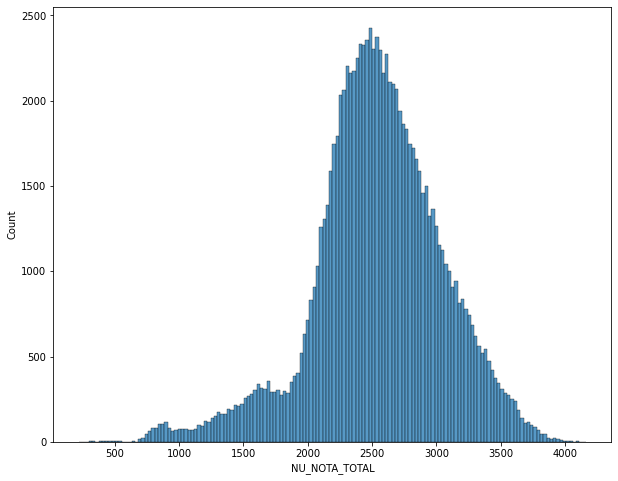

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_TOTAL')

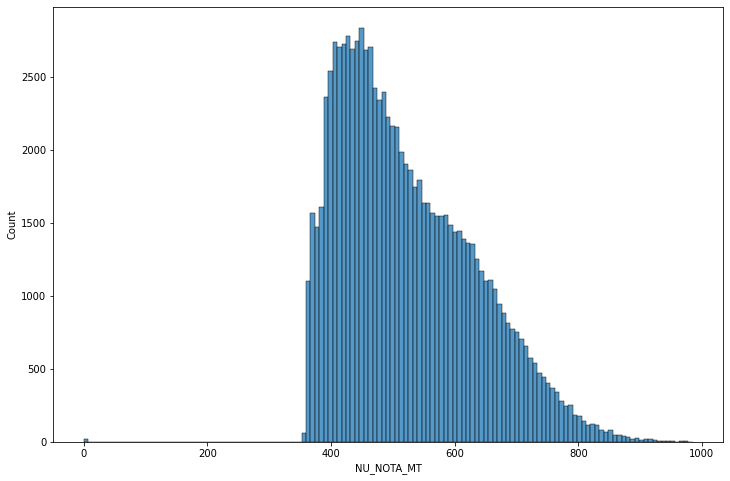

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_MT')

In [ ]:
dados_sem_nota_zero['NU_NOTA_MT'].median()

501.6

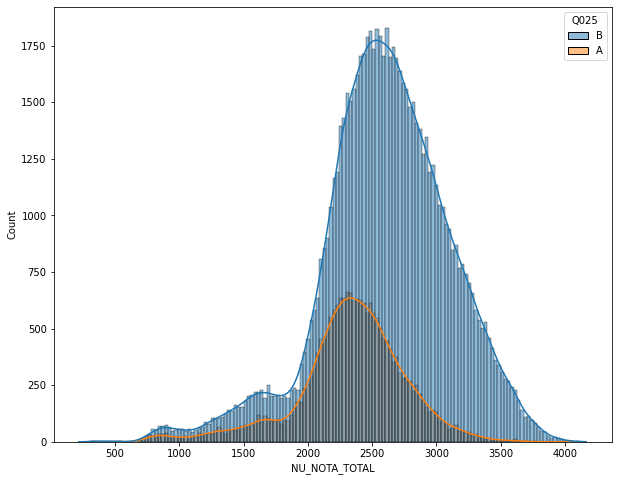

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=True)

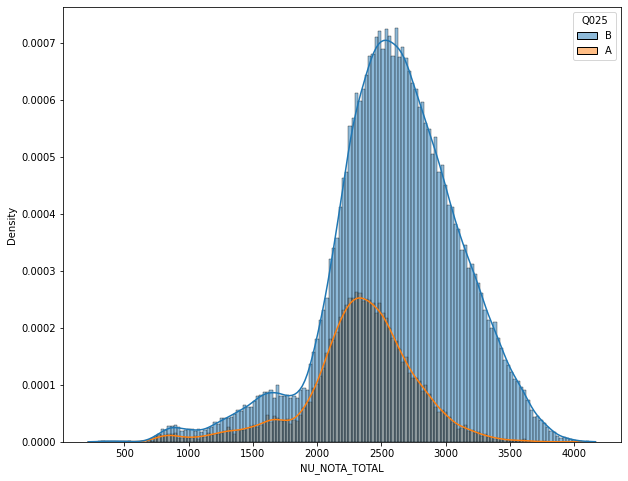

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=True, stat='density')

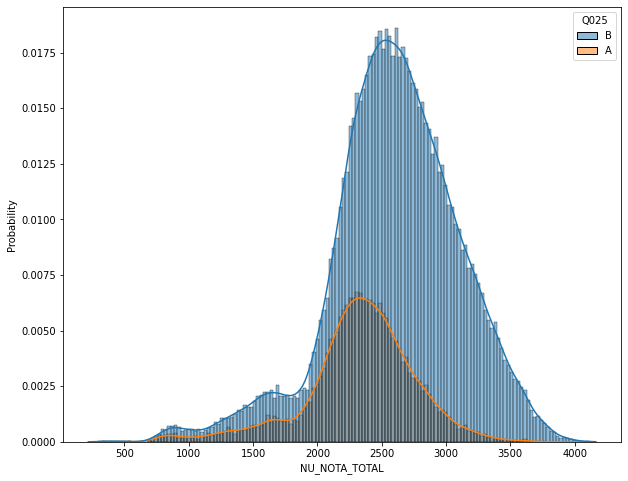

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=True, stat='probability')

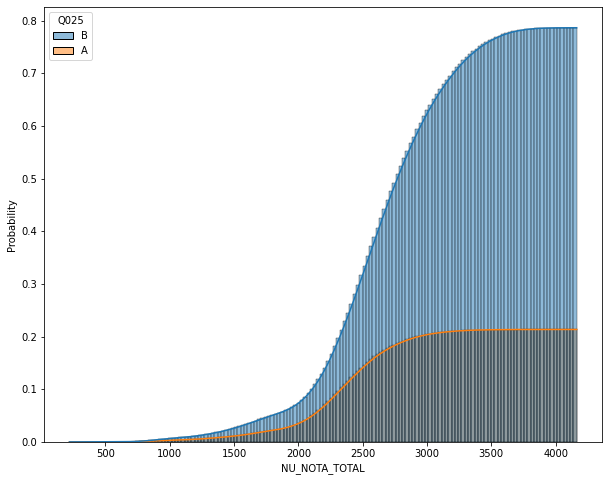

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=True, stat='probability', cumulative=True)

(-50.0, 1050.0)

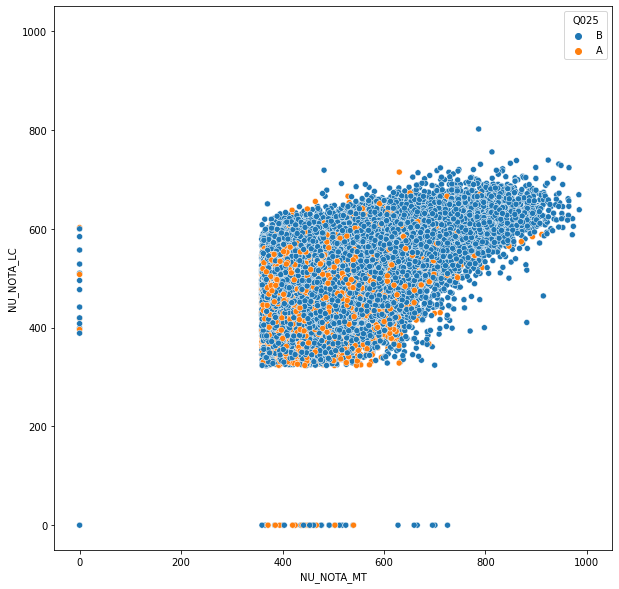

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados_sem_nota_zero, x='NU_NOTA_MT', y='NU_NOTA_LC', hue='Q025')
plt.xlim(-50, 1050)
plt.ylim(-50, 1050)

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_TOTAL']

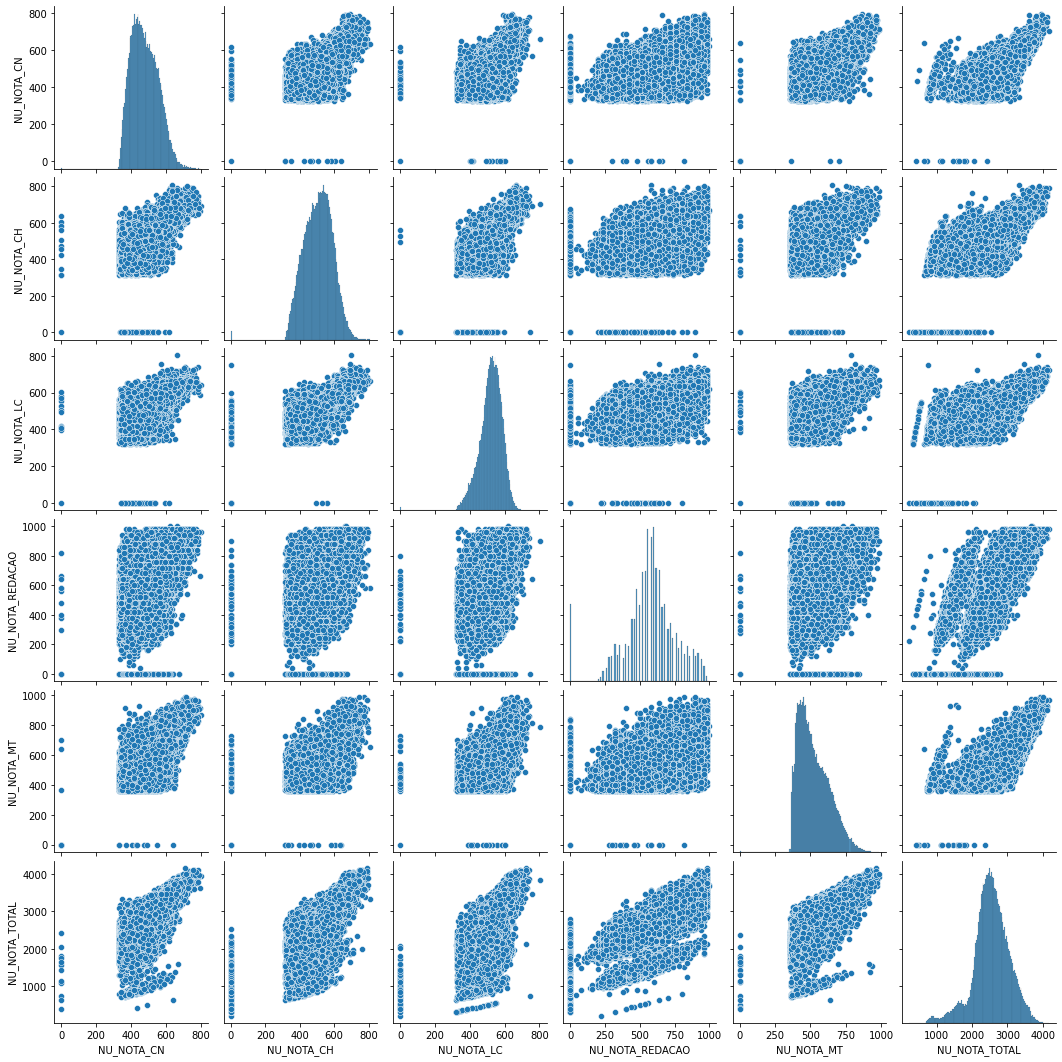

In [ ]:
sns.pairplot(dados_sem_nota_zero[provas])

In [ ]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.641624,0.504740,0.649527,0.785600
NU_NOTA_CH,0.668979,1.000000,0.744170,0.528338,0.610332,0.735534
NU_NOTA_LC,0.641624,0.744170,1.000000,0.535797,0.587710,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.535797,1.000000,0.493046,0.783647
NU_NOTA_MT,0.649527,0.610332,0.587710,0.493046,1.000000,0.790051
NU_NOTA_TOTAL,0.785600,0.735534,0.711686,0.783647,0.790051,1.000000


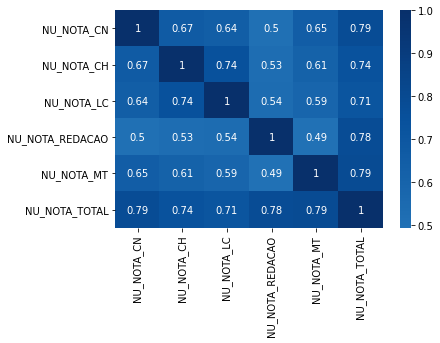

In [ ]:
sns.heatmap(correlacao, cmap='Blues', center=0, annot=True)

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

## Desafio 1: Plotar as modas, médias e medianas nos histogramas de MT e LC.

In [ ]:
def hist_tendencia_central(df, coluna):
  plt.figure(figsize=(12,8))
  sns.histplot(df, x=coluna, alpha=.5, edgecolor='white', kde=True)
  plt.axvline(df[coluna].mean(), color = 'black', linestyle='--', linewidth=2, label='média')
  plt.axvline(df[coluna].median(), color = 'green', linestyle='--', linewidth=2, label='mediana')
  plt.axvline(df[coluna].mode()[0], color = 'red', linestyle='--', linewidth=2, label='moda')
  plt.legend()
  plt.show()

In [ ]:
hist_tendencia_central('NU_NOTA_MT')

TypeError: ignored

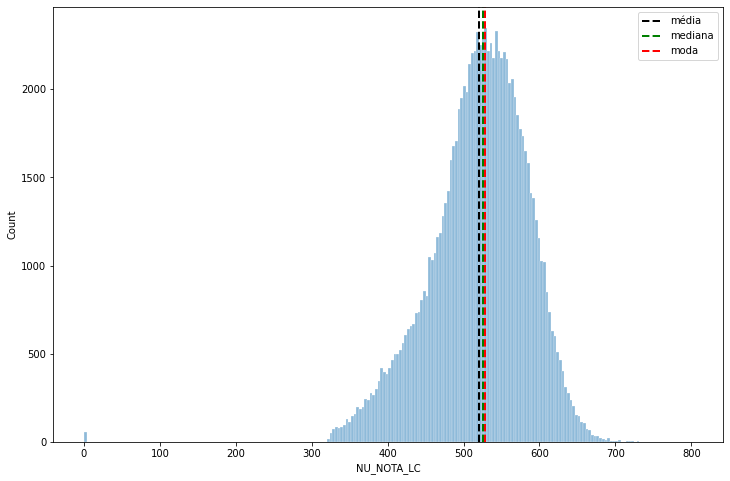

In [ ]:
hist_tendencia_central('NU_NOTA_LC')

## Desafio 2: Melhorar o heatmap tirando os dados de cima.

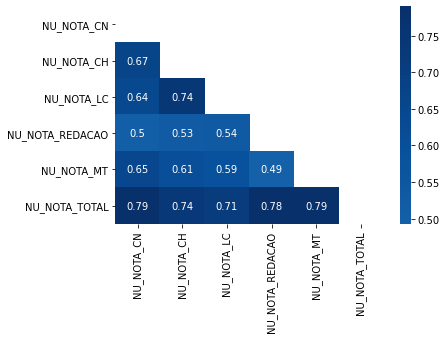

In [ ]:
import numpy as np
mask = np.triu(np.ones_like(correlacao))
sns.heatmap(correlacao, cmap='Blues', center=0, annot=True, mask=mask)

## Desafio 2: Filtrar dados pela sua cidade ou estado, verificando se são semelhantes ao geral.

In [ ]:
dados_sem_zero_ba = dados_sem_nota_zero[dados_sem_nota_zero['SG_UF_RESIDENCIA'] == 'BA']

In [ ]:
dados_sem_zero_alagoinhas = dados_sem_nota_zero[dados_sem_nota_zero['NO_MUNICIPIO_RESIDENCIA'] == 'Alagoinhas']

In [ ]:
def hist_br_ba_alagoinhas(coluna):
  plt.figure(figsize=(20,8))
  plt.subplot(1,3,1)
  sns.histplot(dados_sem_nota_zero, x=coluna, kde=True)
  plt.title('Distribuição de {} no Brasil inteiro'.format(coluna))
  plt.subplot(1,3,2)
  sns.histplot(dados_sem_zero_ba, x=coluna, kde=True)
  plt.title('Distribuição de {} na Bahia'.format(coluna))
  plt.subplot(1,3,3)
  sns.histplot(dados_sem_zero_alagoinhas, x=coluna, kde=True)
  plt.title('Distribuição de {} em Alagoinhas'.format(coluna))
  plt.show()

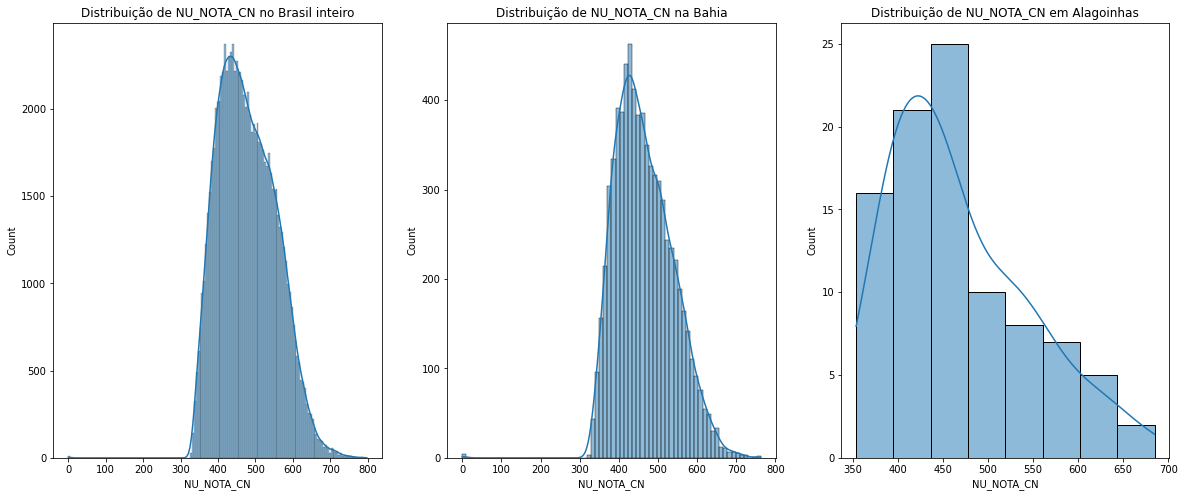

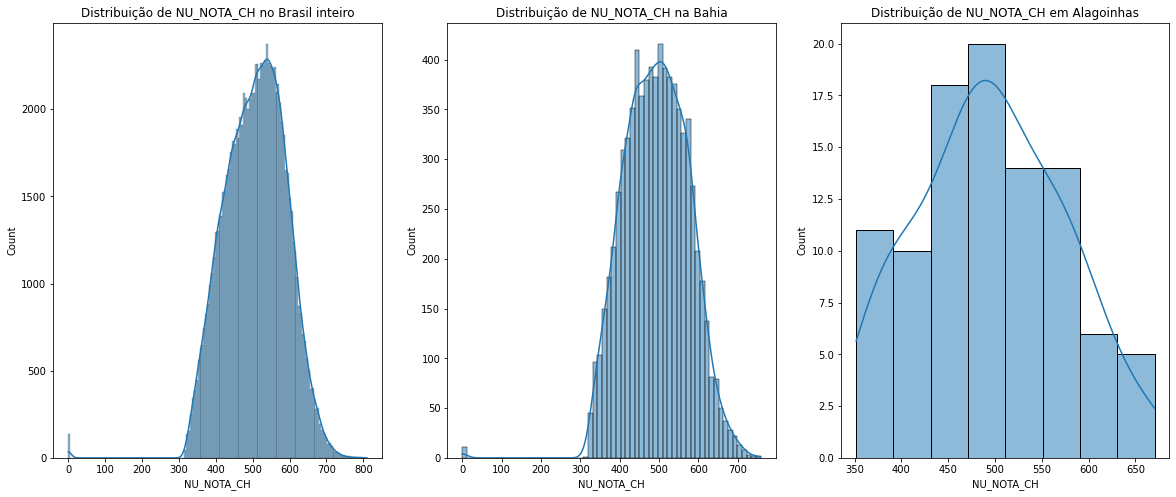

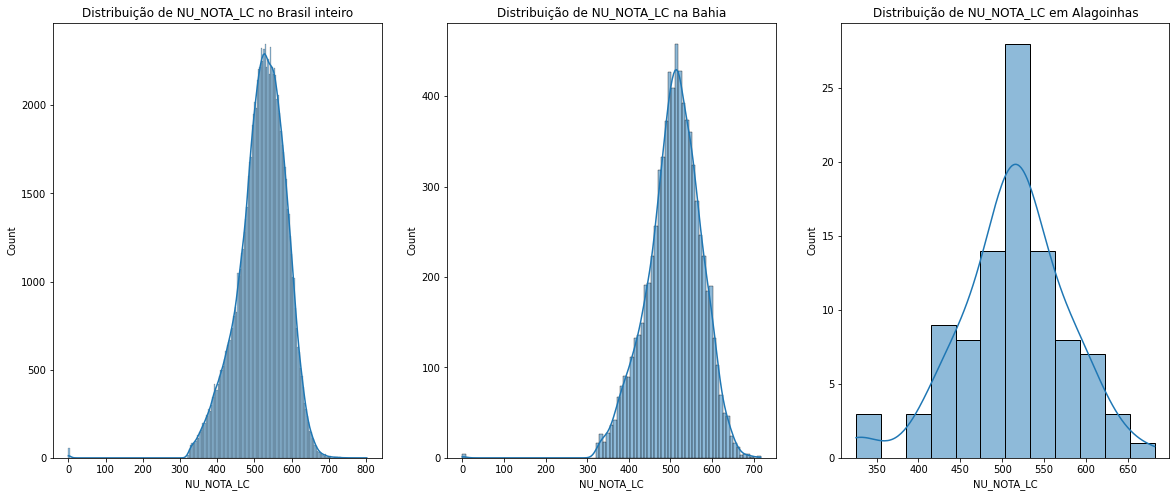

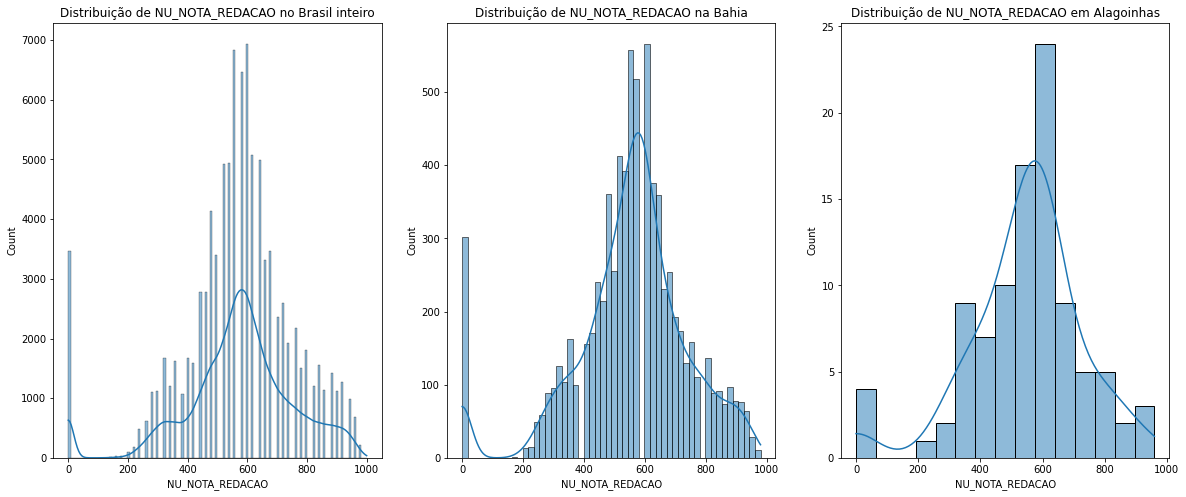

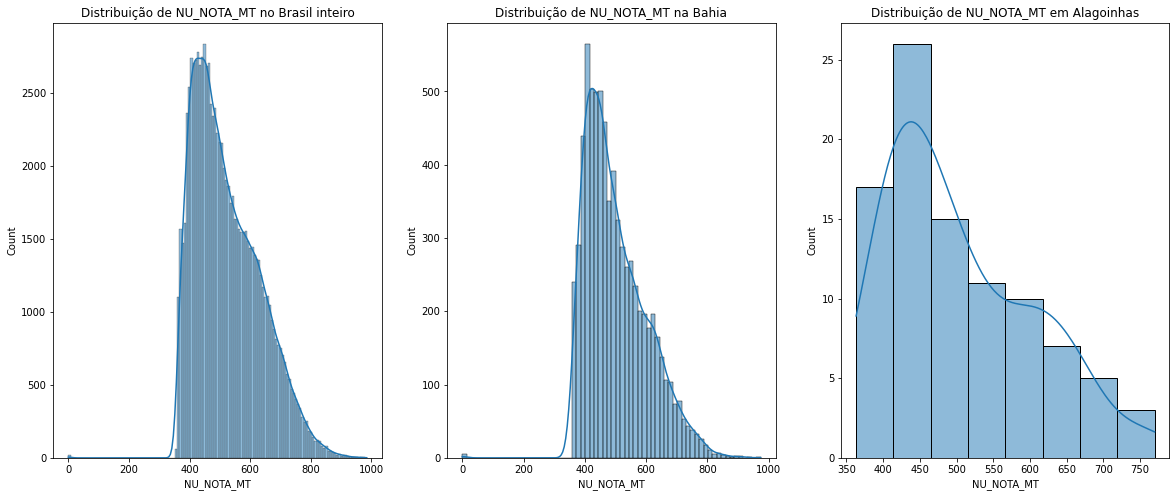

In [ ]:
for prova in provas:
  hist_br_ba_alagoinhas(prova)

In [ ]:
import numpy as np

def boxplot_comparativo(dataframe, coluna, estado, municipio):
  df = dataframe.copy()
  cidade_estado_pais = np.zeros(df.shape[0])

  for i, cidade in enumerate(df[df['SG_UF_RESIDENCIA'] == estado]['NO_MUNICIPIO_RESIDENCIA']):
    if cidade == municipio:
      cidade_estado_pais[i] = 1
    else:
      cidade_estado_pais[i] = 2
  
  df['BR_CIDADE_ESTADO'] = cidade_estado_pais
  df['BR_CIDADE_ESTADO'] = df['BR_CIDADE_ESTADO'].apply(lambda x: municipio if x == 1 else estado if x == 2 else 'Brasil')

  plt.figure(figsize=(12,8))
  sns.boxplot(data=df, y=coluna, x='BR_CIDADE_ESTADO')
  plt.title('{} em Brasil, {} e {}'.format(coluna, municipio, estado), fontsize=14, color='dimgrey', position=(0.5, 0.94))
  plt.show()

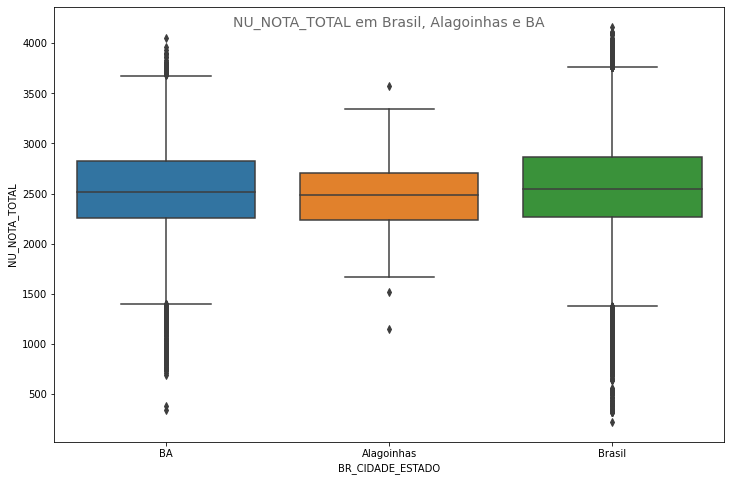

In [ ]:
boxplot_comparativo(dados_sem_nota_zero, 'NU_NOTA_TOTAL', 'BA', 'Alagoinhas')

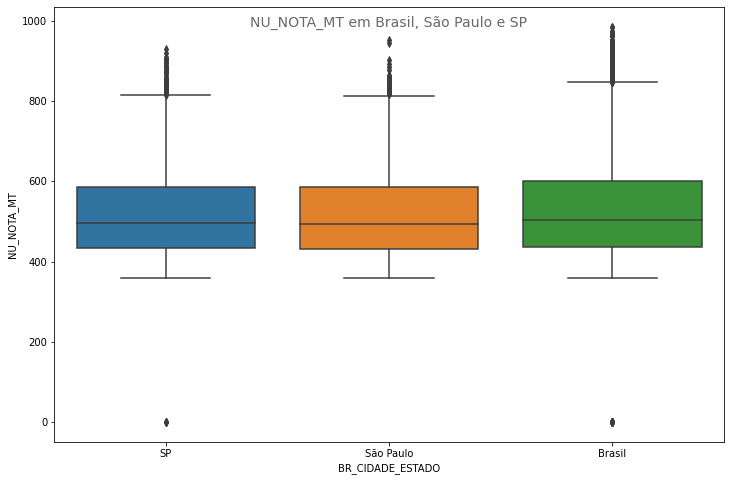

In [ ]:
boxplot_comparativo(dados_sem_nota_zero, 'NU_NOTA_MT', 'SP', 'São Paulo')

## Desafio 3: Pensar sobre a correlação entre matemática e linguagens.